In [2]:
import os
import numpy as np
#import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from subprocess import check_call

C:\Users\hp\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
def create_output_directory():
    # This function is the first one to run, so we want to make sure that the output folder is
    # created before all other functions run.
    try:
        os.mkdir("output")
    except FileExistsError:
        # The folder already exists, so do nothing.
        pass

def read_csv_file(csv_file_name, required_columns):
    """
    This function reads in the csv file and then checks if the file has the correct
    number of columns and also if the column names are correct.
    :param csv_file_name: A string containing the name of the csv file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: data_frame is a pandas data frame which contains the data read from the csv file

    """

    execution_halted_str = 'Execution halted in the function read_csv_file!!!'
    path_of_file = os.path.join(os.getcwd(), csv_file_name)
    if os.path.exists(path_of_file):
        data_frame = pd.read_csv(path_of_file)

        if data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The csv file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                            csv_file_name,
                                                                                            ', '.join(invalid_columns)))
            return data_frame
        else:
            raise Exception(
                "{} The csv file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, csv_file_name))
    else:
        raise FileNotFoundError(
            "{} The csv file {} was not found in the current directory.".format(execution_halted_str, csv_file_name))

def read_excel_file(csv_file_name, required_columns):
    """
    This function reads in the csv file and then checks if the file has the correct
    number of columns and also if the column names are correct.
    :param csv_file_name: A string containing the name of the csv file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: data_frame is a pandas data frame which contains the data read from the csv file

    """

    execution_halted_str = 'Execution halted in the function read_csv_file!!!'
    path_of_file = os.path.join(os.getcwd(), csv_file_name)
    if os.path.exists(path_of_file):
        data_frame = pd.read_excel(path_of_file)

        if data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The csv file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                            csv_file_name,
                                                                                            ', '.join(invalid_columns)))
            return data_frame
        else:
            raise Exception(
                "{} The csv file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, csv_file_name))
    else:
        raise FileNotFoundError(
            "{} The csv file {} was not found in the current directory.".format(execution_halted_str, csv_file_name))


def read_shape_file(shape_file_name, required_columns):
    """
    This function reads in the provided shape file from the disk
    :param shape_file_name:  A string containing the name of the shape file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: geo_data_frame is a geopandas data frame which contains the data read from the shape file
    """

    execution_halted_str = 'Execution halted in the function read_shape_file!!!'
    path_of_file = os.path.join(os.getcwd(), shape_file_name)
    if os.path.exists(path_of_file):

        # This code is checking if the column exists, no matter in what order it comes in the
        # csv file. This means that as long as the column exists in the csv file we do not care,
        # whether it is the first column, or the last column.

        geo_data_frame = geopandas.read_file(shape_file_name)
        if geo_data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(geo_data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The shape file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                              shape_file_name,
                                                                                              ', '.join(
                                                                                                  invalid_columns)))
            return geo_data_frame
        else:
            raise Exception(
                "{} The shape file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, shape_file_name))

    else:
        raise FileNotFoundError(
            "{} The shape file {} was not found in the current directory.".format(execution_halted_str,
                                                                                  shape_file_name))
def read_geojson_file(geojson_file_name, required_columns):
    """
    This function reads in the provided shape file from the disk
    :param geojson_file_name:  A string containing the name of the shape file to read.
    :param required_columns: A list containing the column names that are required by this project for the file.
    :return: geo_data_frame is a geopandas data frame which contains the data read from the shape file
    """

    execution_halted_str = 'Execution halted in the function read_geojson_file!!!'
    path_of_file = os.path.join(os.getcwd(), geojson_file_name)
    if os.path.exists(path_of_file):

        # This code is checking if the column exists, no matter in what order it comes in the
        # csv file. This means that as long as the column exists in the csv file we do not care,
        # whether it is the first column, or the last column.

        geo_data_frame = geopandas.read_file(geojson_file_name)
        if geo_data_frame.columns.size == len(required_columns):

            # This code is checking if the column exists, no matter in what order it comes in the
            # csv file. This means that as long as the column exists in the csv file we do not care,
            # whether it is the first column, or the last column.

            found_invalid_columns = False
            invalid_columns = []
            for column in required_columns:
                try:
                    # If the column is not in the data frame, then a ValueError will be thrown, which
                    # will tell me that there was a problem. If no such error is thrown then the data frame
                    # has all of the required columns.
                    list(geo_data_frame.columns).index(column)
                except ValueError as value_error:
                    found_invalid_columns = True
                    invalid_columns.append(column)

            if found_invalid_columns:
                raise Exception(
                    '{} The geojson file {} provided does not contain the column(s) {}.'.format(execution_halted_str,
                                                                                              geojson_file_name,
                                                                                              ', '.join(
                                                                                                  invalid_columns)))
            return geo_data_frame
        else:
            raise Exception(
                "{} The geojson file {} does not contain all of the required columns. Please check the file and ensure that the columns and their names are correct.".format(
                    execution_halted_str, geojson_file_name))

    else:
        raise FileNotFoundError(
            "{} The geojson file {} was not found in the current directory.".format(execution_halted_str,
                                                                                  geojson_file_name))        
def build_geometry(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return None
        else:    
            return geometry.Point(longitude, latitude)
    else:
        return None
    
def build_longitude(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return 0
        else:    
            return longitude
    else:
        return 0

    
def build_latitude(data):
    """
    This function builds a Shapely Point geometry based on the longitude and latitude values.
    :param data: Pandas data frame
    :return: Shapely Point geometry
    """
    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return 0
        else:    
            return latitude
    else:
        return 0

def write_to_shape_file(dataframe, file_name):
    """
    This function writes the dataframe to a shape file. This function also ensures
    that the folder output exists.
    :param dataframe: geopandas dataframe
    :param file_name: string name for the file
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_shape_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        dataframe.to_file(path_of_file)
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))    
        
def write_to_geojson_file(dataframe, file_name):
    """
    This function writes the dataframe to a shape file. This function also ensures
    that the folder output exists.
    :param dataframe: geopandas dataframe
    :param file_name: string name for the file
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_shape_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        dataframe.to_file(path_of_file, driver="GeoJSON")
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))            

def get_columns_from_data(data, columns):
    """
    This function is a wrapper around the indexing of pandas data frames. This function gets all of the rows
    from the data frame.
    :param data: Pandas data frame
    :param columns: The columns which are to be selected.
    :return: Pandas data frame
    """
    return data.loc[:, columns]


def get_columns_from_data_range_rows(data, start_row, end_row, columns):
    """
    This function is a wrapper around the indexing of pandas data frames. This function gets some of the rows
    from the data frame specified by the start_row and end_row.
    :param data: Pandas data frame
    :param start_row: int value specifying the row to start from
    :param end_row: int value specifying the row to end at
    :param columns: The columns which are to be selected.
    :return: Pandas data frame
    """
    return data.loc[start_row:end_row, columns]   

def group_by_data(data, columns):
    """
    This is a wrapper function which wraps around the pandas group by function.
    :param data: Pandas data frame
    :param columns: The columns which are to be used to be group the data frame on
    :return: Pandas data frame
    """
    return data.groupby(columns).size().to_frame('count').reset_index()

def plot_bar_plot(x, y, x_axis_label, y_axis_label, title):
    """
    This function plots a bar plot of values of x against the y
    :param x: list of x values
    :param y: list of y values
    :param x_axis_label: list of labels for x
    :param y_axis_label: list of labels for y
    :param title: string value for the title of the plot
    :return: the filename of the figure that has been saved.
    """
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xlabel(x_axis_label, fontsize=10)
    ax.set_ylabel(y_axis_label, fontsize=10)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=10, rotation=90)
    ax.set_title(title)
    # ax.legend(loc='upper right', frameon=True)
    plt.show()
    file_name = ((((title + '.png').replace('/', ''))).replace(' ', '_')).lower()
    # fig.savefig('output/' + file_name, dpi=100, bbox_inches='tight')
    return write_to_image_file(fig, file_name, False, 100)

def write_to_image_file(figure, file_name, more_options, dpi):
    """
    This function writes an image file. This function also ensures
    that the folder output exists.
    :param figure: matplotlib figure
    :param file_name: string name of the file
    :param more_options: boolean whether we want more options or not
    :param dpi: int value for the dpi
    :return: string path to the file
    """
    execution_halted_str = 'Execution halted in the function write_to_image_file!!!'
    path_of_directory = os.path.join(os.getcwd(), "output")
    path_of_file = os.path.join(os.getcwd(), "output", file_name)
    if os.path.exists(path_of_directory):
        if more_options:
            figure.savefig(path_of_file, dpi=dpi, cmap='summer', edgecolor='black', linewidth=0.2, alpha=1,
                           bbox_inches='tight')
        else:
            figure.savefig(path_of_file, dpi=dpi, bbox_inches='tight')
        return path_of_file
    else:
        raise FileNotFoundError(
            "{} The file {} was not found in the current directory.".format(execution_halted_str,
                                                                            path_of_directory))

def plot_db_scan(X, model):
    """
    This code plots the clustered points. This function has been inspired from the
    DBSCAN example (https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) and the example provide
    by Elham https://notebooks.azure.com/ElhamN/projects/GEOM90042-1/html/L6/plotClusters.py
    :param X: a 2D numpy array of coordinates
    :param model: a model containg the DBSCAN result
    """
    # plotting the results
    labels = model.labels_
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    print(len(labels))
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        plt.savefig('output/dbscan_cluster1.png', dpi=200, bbox_inches='tight')
        return write_to_image_file(plt, "dbscan_cluster.png", False, 100)

def get_type_of_hour_day(data):
    """
    This function returns a string representation of the type of hour of day
    :param x: int value of hour
    :return: string representation of the type of hour of day
    """
    
    time_of_accident = data['Time Occurred']
    hour = int(time_of_accident/100)
    if hour >= 0 and hour <= 5:
        return 'Early Morning'
    elif hour >= 6 and hour <= 11:
        return 'Morning'
    elif hour >= 12 and hour <= 14:
        return 'Early Afternoon'
    elif hour >= 15 and hour <= 17:
        return 'Afternoon'
    elif hour >= 18 and hour <= 19:
        return 'Early Evening'
    elif hour >= 20 and hour <= 23:
        return 'Night'
    
def categorize_type_of_day(data):
    """
    This function returns either the day provided is a week day or a weekend.
    :param x: string value of day
    :return: string
    """
    date_of_accident = parse(data['Date Occurred'].split('T')[0])
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    day_type = weekDays[date_of_accident.weekday()]

    if day_type == 'Monday':
        return 'Week Day'
    elif day_type == 'Tuesday':
        return 'Week Day'
    elif day_type == 'Wednesday':
        return 'Week Day'
    elif day_type == 'Thursday':
        return 'Week Day'
    elif day_type == 'Friday':
        return 'Week Day'
    else:
        return 'Weekend'   
    
def seperate_years(data):
    return parse(data['Date Occurred'].split('T')[0]).year    

def concat_day_hour_type(data):
    return data['DAY_TYPE']+'-'+data['HOUR_TYPE']

def specify_descent(data):
    descents={
    "A":"Other Asian", "B":"Black","C":"Chinese","D":"Cambodian",
    "F":"Filipino","G":"Guamanian","H":"Hispanic/Latin/Mexican",
    "I":"American Indian/Alaskan Native","J":"Japanese",
    "K":"Korean","L":"Laotian","O":"Other","P":"Pacific Islander",
    "S":"Samoan","U":"Hawaiian","V":"Vietnamese","W":"White",
    "X":"Unknown","Z":"Asian Indian"
    }
    return descents[data['Victim Descent']]

def generate_range_bins(bins):
    """
    This function returns generates a range bin from a list of increasing numbers.
    :param bins: list of numbers
    :return: string representation of a range
    """
    bins = [int(x) for x in bins]
    bins_sets=[]
    for i, val in enumerate(bins):
        if i==0:
            bins_sets.append((bins[i],bins[i+1]))
        elif i>0 and i<len(bins)-1:
            bins_sets.append((bins[i]+1,bins[i+1]))
    return bins_sets

def get_range(numerical_value, bins):
    bins_sets=generate_range_bins(bins)
    range=""
    for bin in bins_sets:
        if numerical_value >= bin[0] and numerical_value<=bin[1]:
            range="{}-{}".format(bin[0],bin[1])
            break

    if range is "":
        return "{}+".format(bins_sets[-1][1])
    else:
        return range 
    
    
def sort_ranges(range_bin, ranges, count_list):
    # The following code gets the order of the range according to the bin associated with that range, and then 
    # in the end sorts the ranges based on the index that has been retrieved bringing the ranges in the correct order.
    range_bins=[]
    for i,r in enumerate(ranges):
        if '+' in r:
            p1=int(r.split('+')[0])            
            if p1>= range_bin[-1][1]:
                range_bins.append([len(range_bin)-1,r, count_list[i]])
        else:            
            p1=int(r.split('-')[0])
            p2=int(r.split('-')[1])
            index=range_bin.index((p1,p2))
            range_bins.append([index,r, count_list[i]])
    range_bins=sorted(range_bins, key=lambda x: x[0])
    range_bin=[x[1] for x in range_bins]
    range_counts=[x[2] for x in range_bins]
    return range_bin, range_counts

def calculate_correlation_coefficient(x, y):
    """
    This function calculates the correlation coefficient of between the x and y values
    :param x: list of x values
    :param y: list of y values
    :return: correlation coefficient
    """
    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    denominator = np.sqrt(np.sum((x - np.mean(x)) ** 2) * np.sum((y - np.mean(y)) ** 2))
    if denominator > 0:
        return numerator / denominator
    else:
        return 0
    
def plot_db_scan(X, model):
    """
    This code plots the clustered points. This function has been inspired from the
    DBSCAN example (https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) and the example provide
    by Elham https://notebooks.azure.com/ElhamN/projects/GEOM90042-1/html/L6/plotClusters.py
    :param X: a 2D numpy array of coordinates
    :param model: a model containg the DBSCAN result
    """
    # plotting the results
    labels = model.labels_
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    print(len(labels))
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        plt.savefig('output/dbscan_cluster1.png', dpi=200, bbox_inches='tight')
        return write_to_image_file(plt, "dbscan_cluster.png", False, 100)
    
    
    
def calculate_annual_salary_percentile(annual_salary, annual_salary_list):
    annual_salary_percentiles=np.percentile(annual_salary_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_salary_percentiles):
        if annual_salary>val:
            percentile=i
    annual_salary_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def calculate_annual_balance_percentile(annual_balance, annual_balance_list):
    annual_balance_percentiles=np.percentile(annual_balance_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_balance_percentiles):
        if annual_balance>val:
            percentile=i
    annual_balance_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def calculate_annual_spending_percentile(annual_spending, annual_spending_list):
    annual_spending_percentiles=np.percentile(annual_spending_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_spending_percentiles):
        if annual_spending>val:
            percentile=i
    annual_spending_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

def perform_classification(data):
    '''
    >80 and <100 high
    >60 and <79 med
    >30 and <59 low
    >0 and <29 extra low
    
    healthy
    unhealthy
    '''
    if data['annual_salary_percentile']>=80 and data['annual_salary_percentile']<=100:
        salary_state='high'
    elif data['annual_salary_percentile']>=60 and data['annual_salary_percentile']<=79:
        salary_state='medium'
    elif data['annual_salary_percentile']>=0 and data['annual_salary_percentile']<=59:        
        salary_state='low'
    else:
        salary_state='low'
        
    if data['annual_balance_percentile']>=80 and data['annual_balance_percentile']<=100:
        balance_state='high'
    elif data['annual_balance_percentile']>=60 and data['annual_balance_percentile']<=79:
        balance_state='medium'
    elif data['annual_balance_percentile']>=0 and data['annual_balance_percentile']<=59:        
        balance_state='low'
    else:
        balance_state='low'
    
    if data['annual_spending_percentile']>=80 and data['annual_spending_percentile']<=100:
        spending_state='high'
    elif data['annual_spending_percentile']>=60 and data['annual_spending_percentile']<=79:
        spending_state='medium'
    elif data['annual_spending_percentile']>=0 and data['annual_spending_percentile']<=59:        
        spending_state='low'
    else:
        spending_state='low'
    
    if salary_state=='high' and balance_state=='low' and spending_state=='high':
        return 'healthy'
    elif salary_state=='low' and balance_state=='high' and spending_state=='low':    
        return 'healthy'
    elif salary_state=='high' and balance_state=='high' and spending_state=='low':
        return 'healthy'
    elif salary_state=='low' and balance_state=='low' and spending_state=='high':
        return 'unhealthy'
    elif salary_state=='low' and balance_state=='low' and spending_state=='low':
        return 'unhealthy'
    elif salary_state=='high' and balance_state=='high' and spending_state=='high':
        return 'unhealthy'
    else:
        return 'unhealthy'
    
def perform_classification_2(data):
    '''
    annual_spending > annual_salary and annual_spending > annual_balance then unhealthy
    annual_spending > annual_salary and annual_spending < annual_balance then somewhat healthy
    annual_spending < annual_salary and annual_spending > annual_balance then somewhat healthy
    annual_spending < annual_salary and annual_spending < annual_balance then healthy
    '''
    if data['annual_spending']>data['annual_salary'] and data['annual_spending']>data['annual_balance']:
        return 'unhealthy'
    elif data['annual_spending']>data['annual_salary'] and data['annual_spending']<data['annual_balance']:
        return 'somewhat healthy'
    elif data['annual_spending']<data['annual_salary'] and data['annual_spending']>data['annual_balance']:
        return 'somewhat healthy'
    elif data['annual_spending']<data['annual_salary'] and data['annual_spending']<data['annual_balance']:
        return 'healthy'
    else:
        return 'unhealthy'
        

In [4]:
create_output_directory()

In [7]:
required_columns = ["status","card_present_flag","bpay_biller_code","account","currency","long_lat","txn_description","merchant_id","merchant_code","first_name","balance","date","gender","age","merchant_suburb","merchant_state","extraction","amount","transaction_id","country","customer_id","merchant_long_lat","movement"]
data_frame = read_excel_file("anz_data.xlsx", required_columns)

In [8]:
data_frame.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [9]:
data_frame.head()
salary_trans = data_frame[data_frame['txn_description']=='PAY/SALARY']
pos_pos_sales = data_frame[(data_frame['txn_description']=='POS') | (data_frame['txn_description']=='SALES-POS')]
#accidents_locations_area_name=get_columns_from_data(accidents_locations_zones, ['DR Number','Area Name'])
#male_salary=salary_trans[salary_trans['gender']=='M']
#female_salary=salary_trans[salary_trans['gender']=='F']
#pos_pos_sales

In [10]:
#average_male_salary=male_salary['amount'].values.mean()
#average_female_salary=female_salary['amount'].values.mean()

In [11]:
eric=salary_trans[salary_trans['first_name']=='Eric']
eric[['amount','age','customer_id','first_name','date','balance']].head()

,amount,age,customer_id,first_name,date,balance
64,983.36,22,CUS-326006476,Eric,2018-08-01,3158.51
842,1757.82,42,CUS-3151318058,Eric,2018-08-07,34865.92
941,983.36,22,CUS-326006476,Eric,2018-08-08,3675.24
1838,983.36,22,CUS-326006476,Eric,2018-08-15,4475.72
2531,1757.82,42,CUS-3151318058,Eric,2018-08-21,36477.74


In [12]:
customers=group_by_data(salary_trans,['customer_id'])

In [13]:
annual_salary=[]
age=[]
annual_balance=[]
annual_spending=[]
for i in customers['customer_id'].values:
    #print(i)
    salary_for_user=salary_trans[salary_trans['customer_id']==i]
    annual_salary.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['amount'].values.sum())
    age.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['age'].iloc[0])
    annual_balance.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['balance'].values.sum())
    spending=pos_pos_sales[pos_pos_sales['customer_id']==i]
    annual_spending.append(spending['amount'].values.sum())
annual_salary=np.array(annual_salary).reshape(-1,1)
age=np.array(age).reshape(-1,1)
annual_balance=np.array(annual_balance).reshape(-1,1)
annual_spending=np.array(annual_spending).reshape(-1,1)

In [14]:
scaled_annual_salary=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_salary)
for i in annual_salary:
    scaled_annual_salary.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_salary)
scaled_annual_salary=np.array(scaled_annual_salary).reshape(-1,1)

scaled_annual_balance=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_balance)
for i in annual_balance:
    scaled_annual_balance.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_balance)
scaled_annual_balance=np.array(scaled_annual_balance).reshape(-1,1)

scaled_annual_spending=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_spending)
for i in annual_spending:
    scaled_annual_spending.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_annual_spending=np.array(scaled_annual_spending).reshape(-1,1)

scaled_age=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(age)
for i in age:
    scaled_age.append(scaler.transform([[i[0]]])[0][0])
#print(scaled_annual_spending)
scaled_age=np.array(scaled_age).reshape(-1,1)

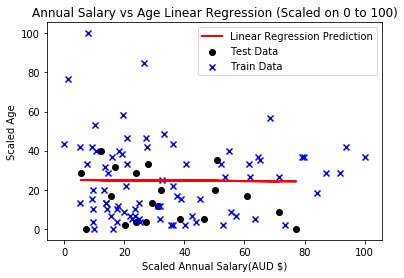

Mean Absolute Error: 13.39
Mean Squared Error: 231.82
Root Mean Squared Error: 15.23
Correlation Coefficient r: -0.04


In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_salary, scaled_age, test_size=0.2, random_state=0)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Salary(AUD $)")
ax.set_ylabel("Scaled Age")
ax.set_title('Annual Salary vs Age Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.savefig('annual_salary_age.png', dpi=100, bbox_inches='tight')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))
#print('Accuracy:',metrics.explained_variance_score(y_test,y_predict))
print('Correlation Coefficient r:', round(calculate_correlation_coefficient(scaled_annual_salary, scaled_age),2))

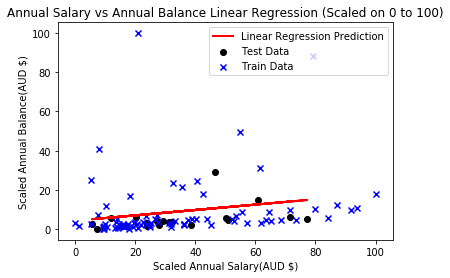

Mean Absolute Error: 5.46
Mean Squared Error: 43.29
Root Mean Squared Error: 6.58
Correlation Coefficient r: 0.22


In [16]:
#print(calculate_correlation_coefficient(annual_salary, age))
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_salary, scaled_annual_balance, test_size=0.2, random_state=0)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Salary(AUD $)")
ax.set_ylabel("Scaled Annual Balance(AUD $)")
ax.set_title('Annual Salary vs Annual Balance Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.savefig('annual_salary_annual_balance.png', dpi=100, bbox_inches='tight')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))
#print('Accuracy:',metrics.explained_variance_score(y_test,y_predict))
print('Correlation Coefficient r:', round(calculate_correlation_coefficient(scaled_annual_salary, scaled_annual_balance),2))

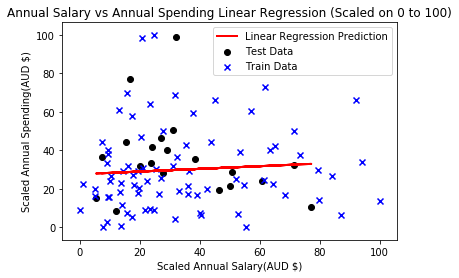

Mean Absolute Error: 15.12
Mean Squared Error: 489.82
Root Mean Squared Error: 22.13
Correlation Coefficient r: 0.03


In [17]:
#print(calculate_correlation_coefficient(annual_salary, age))
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_salary, scaled_annual_spending, test_size=0.2, random_state=0)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Salary(AUD $)")
ax.set_ylabel("Scaled Annual Spending(AUD $)")
ax.set_title('Annual Salary vs Annual Spending Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.savefig('annual_salary_annual_spending.png', dpi=100, bbox_inches='tight')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))
#print('Accuracy:',metrics.explained_variance_score(y_test,y_predict))
print('Correlation Coefficient r:', round(calculate_correlation_coefficient(scaled_annual_salary, scaled_annual_spending),2))

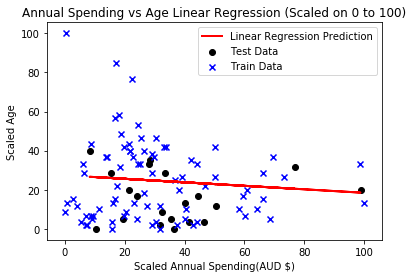

Mean Absolute Error: 13.14
Mean Squared Error: 227.14
Root Mean Squared Error: 15.07
Correlation Coefficient r: -0.1


In [18]:
#print(calculate_correlation_coefficient(annual_salary, age))
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_spending, scaled_age, test_size=0.2, random_state=0)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Spending(AUD $)")
ax.set_ylabel("Scaled Age")
ax.set_title('Annual Spending vs Age Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.savefig('annual_spending_age.png', dpi=100, bbox_inches='tight')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))
#print('Accuracy:',metrics.explained_variance_score(y_test,y_predict))
print('Correlation Coefficient r:', round(calculate_correlation_coefficient(scaled_annual_spending, scaled_age),2))

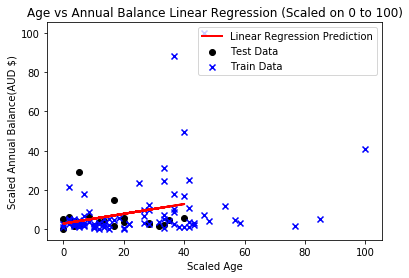

Mean Absolute Error: 5.4
Mean Squared Error: 56.24
Root Mean Squared Error: 7.5
Correlation Coefficient r: 0.29


In [19]:
#print(calculate_correlation_coefficient(annual_salary, age))
X_train, X_test, y_train, y_test = train_test_split(scaled_age, scaled_annual_balance, test_size=0.2, random_state=0)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Age")
ax.set_ylabel("Scaled Annual Balance(AUD $)")
ax.set_title('Age vs Annual Balance Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.savefig('age_annual_balance.png', dpi=100, bbox_inches='tight')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))
#print('Accuracy:',metrics.explained_variance_score(y_test,y_predict))
print('Correlation Coefficient r:', round(calculate_correlation_coefficient(scaled_age, scaled_annual_balance),2))

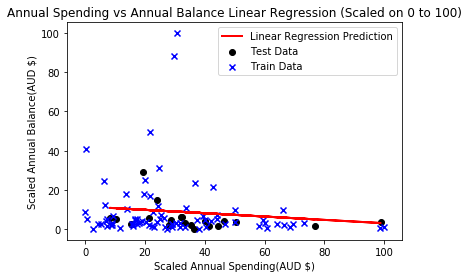

Mean Absolute Error: 5.5
Mean Squared Error: 43.2
Root Mean Squared Error: 6.57
Correlation Coefficient r: -0.13


In [20]:
#print(calculate_correlation_coefficient(annual_salary, age))
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_spending, scaled_annual_balance, test_size=0.2, random_state=0)
fig, ax = plt.subplots()
lr = LinearRegression().fit(X_train, y_train)
y_predict=predict=lr.predict(X_test)
ax.set_xlabel("Scaled Annual Spending(AUD $)")
ax.set_ylabel("Scaled Annual Balance(AUD $)")
ax.set_title('Annual Spending vs Annual Balance Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='black', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='blue', marker='x', label='Train Data')
ax.plot(X_test, y_predict, color='red', linewidth=2, label='Linear Regression Prediction')
ax.legend(loc='upper right')
plt.savefig('annual_spending_annual_balance.png', dpi=100, bbox_inches='tight')
plt.show()
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_predict),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_predict),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),2))
#print('Accuracy:',metrics.explained_variance_score(y_test,y_predict))
print('Correlation Coefficient r:', round(calculate_correlation_coefficient(scaled_annual_spending, scaled_annual_balance),2))

In [21]:
annual_salary=[]
age=[]
annual_balance=[]
annual_spending=[]
for i in customers['customer_id'].values:
    #print(i)
    salary_for_user=salary_trans[salary_trans['customer_id']==i]
    annual_salary.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['amount'].values.sum())
    age.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['age'].iloc[0])
    annual_balance.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['balance'].values.sum())
    spending=pos_pos_sales[pos_pos_sales['customer_id']==i]
    annual_spending.append(spending['amount'].values.sum())

In [22]:
scaled_annual_salary=[]
annual_salary_np=np.array(annual_salary).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_salary_np)
for i in annual_salary:
    scaled_annual_salary.append(scaler.transform([[i]])[0][0])
#scaled_annual_salary=np.array(scaled_annual_salary).reshape(-1,1)
#print(scaled_annual_salary)

scaled_annual_balance=[]
annual_balance_np=np.array(annual_balance).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_balance_np)
for i in annual_balance:
    scaled_annual_balance.append(scaler.transform([[i]])[0][0])
#print(scaled_annual_balance)

scaled_annual_spending=[]
annual_spending_np=np.array(annual_spending).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_spending_np)
for i in annual_spending:
    scaled_annual_spending.append(scaler.transform([[i]])[0][0])
#print(scaled_annual_spending)

In [23]:
anz_dataframe = pd.DataFrame({'annual_salary':annual_salary,'annual_balance':annual_balance,'annual_spending':annual_spending, 'scaled_annual_salary':scaled_annual_salary, 'scaled_annual_balance':scaled_annual_balance, 'scaled_annual_spending':scaled_annual_spending})
anz_dataframe.head()

,annual_salary,annual_balance,annual_spending,scaled_annual_salary,scaled_annual_balance,scaled_annual_spending
0,12616.11,61342.65,1810.86,19.370504,3.028202,18.020394
1,25050.55,83700.42,3975.82,63.483097,4.451359,40.182583
2,11499.06,35050.32,4389.54,15.407642,1.354596,44.417738
3,22248.07,114575.08,3885.75,53.540980,6.416648,39.260557
4,27326.11,166920.02,4940.61,71.555905,9.748601,50.058913


In [24]:
#anz_transactions_pos_pos_sales['AGE_RANGE']=anz_transactions_pos_pos_sales['age'].apply(get_range, args=(age_bins,))
anz_dataframe['annual_salary_percentile']=anz_dataframe['scaled_annual_salary'].apply(calculate_annual_salary_percentile, args=(scaled_annual_salary,))
anz_dataframe['annual_balance_percentile']=anz_dataframe['scaled_annual_balance'].apply(calculate_annual_balance_percentile, args=(scaled_annual_balance,))
anz_dataframe['annual_spending_percentile']=anz_dataframe['scaled_annual_spending'].apply(calculate_annual_spending_percentile, args=(scaled_annual_spending,))
anz_dataframe['account_health']=anz_dataframe.apply(perform_classification, axis=1)
#anz_dataframe['account_health']=anz_dataframe.apply(perform_classification_2, axis=1)

In [25]:
#anz_dataframe[anz_dataframe['annual_salary_percentile']>10]
#anz_dataframe[anz_dataframe['account_health']=='healthy'].head()
anz_dataframe.head()

,annual_salary,annual_balance,annual_spending,scaled_annual_salary,scaled_annual_balance,scaled_annual_spending,annual_salary_percentile,annual_balance_percentile,annual_spending_percentile,account_health
0,12616.11,61342.65,1810.86,19.370504,3.028202,18.020394,30,40,20,unhealthy
1,25050.55,83700.42,3975.82,63.483097,4.451359,40.182583,80,50,70,unhealthy
2,11499.06,35050.32,4389.54,15.407642,1.354596,44.417738,20,10,80,unhealthy
3,22248.07,114575.08,3885.75,53.540980,6.416648,39.260557,70,70,70,unhealthy
4,27326.11,166920.02,4940.61,71.555905,9.748601,50.058913,80,80,80,unhealthy


In [28]:
feature_cols=['annual_salary_percentile', 'annual_balance_percentile', 'annual_spending_percentile']
X = anz_dataframe[feature_cols] # Features
y = anz_dataframe['account_health'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
# Entropy with max_depth 4 gives the best accuracy.
clf = DecisionTreeClassifier(criterion='entropy')#,max_depth=10,min_samples_split=2,min_samples_leaf=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
dot_data = StringIO()
export_graphviz(clf, out_file='decision_tree.dot',  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['unhealthy','healthy'])
check_call(['dot','-Tpng','decision_tree.dot','-o','decision_tree.png'])

Accuracy: 0.9


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [27]:
Image('decision_tree.png')

FileNotFoundError: No such file or directory: 'decision_tree.png'

FileNotFoundError: No such file or directory: 'decision_tree.png'

<IPython.core.display.Image object>